In [1]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [13]:
cwd = os.getcwd()
adata = sc.read_h5ad('/Users/priyaltripathi/Kinker-/Kinker240701_kinker_anndata.h5ad')

In [11]:
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    #sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    sc.tl.umap(adata, random_state=random_state)
    sc.tl.leiden(adata, random_state=random_state)
    return adata

In [14]:
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)

/var/folders/gl/skbb6bb17rd_vw7ccnl22d0r0000gn/T/ipykernel_5366/2934595701.py:9: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata, random_state=random_state)


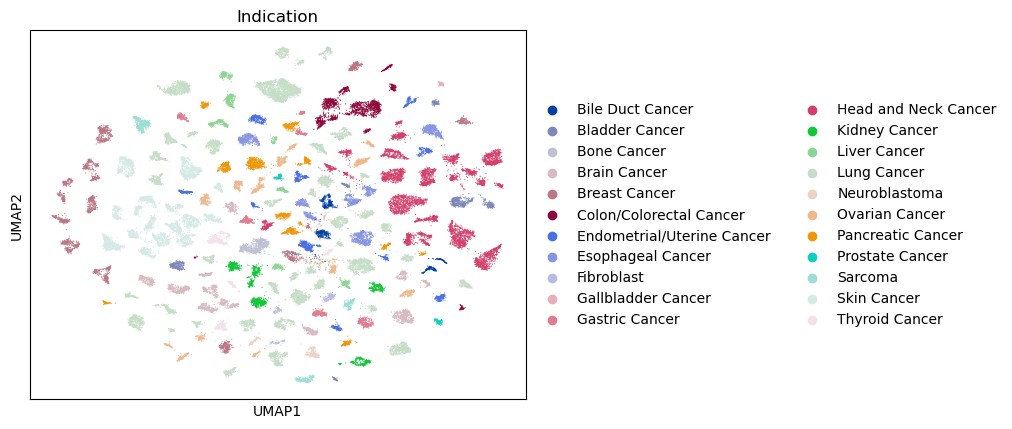

In [18]:
sc.pl.umap(adata, color=['Indication'])

In [21]:
#Exploring ERBB2 expression
'ERBB2' in adata.var_names

True

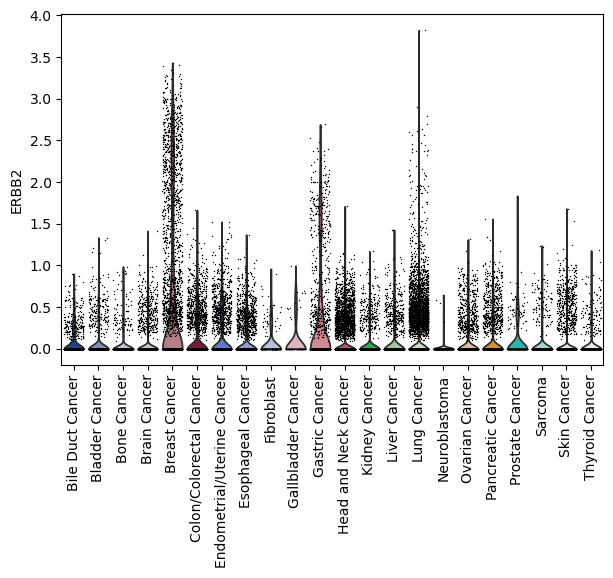

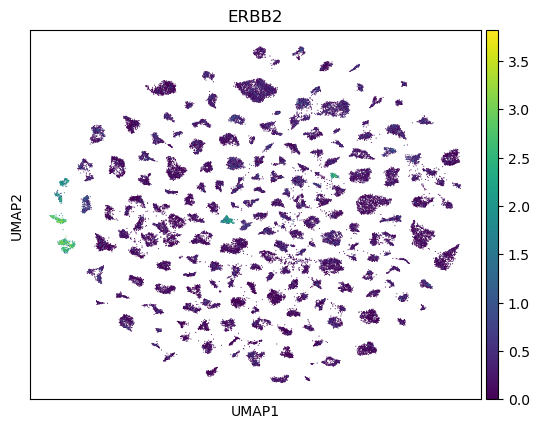

In [22]:
sc.pl.violin(adata, keys='ERBB2', groupby='Indication', rotation=90, jitter=0.4)
sc.pl.umap(adata, color=['ERBB2'])

In [23]:
erbb2_expr = adata[:, 'ERBB2'].X.toarray().flatten()
adata.obs['ERBB2_expr'] = erbb2_expr
print(adata.obs.groupby('Indication')['ERBB2_expr'].mean())

Indication
Bile Duct Cancer              0.098163
Bladder Cancer                0.072726
Bone Cancer                   0.040907
Brain Cancer                  0.056742
Breast Cancer                 0.646864
Colon/Colorectal Cancer       0.169277
Endometrial/Uterine Cancer    0.163751
Esophageal Cancer             0.108441
Fibroblast                    0.081263
Gallbladder Cancer            0.092686
Gastric Cancer                0.395266
Head and Neck Cancer          0.088141
Kidney Cancer                 0.069091
Liver Cancer                  0.100108
Lung Cancer                   0.101207
Neuroblastoma                 0.005929
Ovarian Cancer                0.088429
Pancreatic Cancer             0.108401
Prostate Cancer               0.105037
Sarcoma                       0.056610
Skin Cancer                   0.049322
Thyroid Cancer                0.052855
Name: ERBB2_expr, dtype: float64


/var/folders/gl/skbb6bb17rd_vw7ccnl22d0r0000gn/T/ipykernel_5366/455582668.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata.obs.groupby('Indication')['ERBB2_expr'].mean())


/Users/priyaltripathi/mambaforge/envs/kinker/lib/python3.9/site-packages/scanpy/plotting/_utils.py:487: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


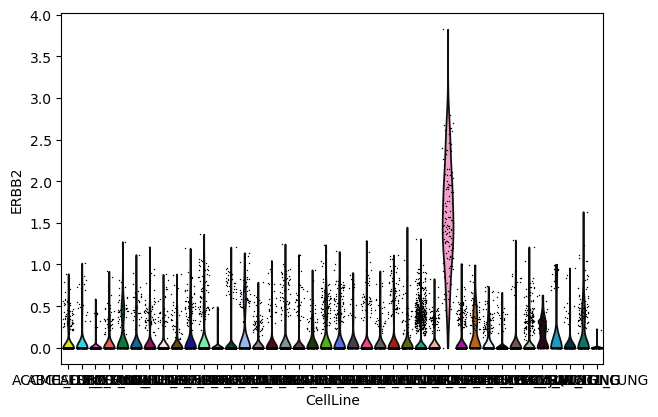

In [25]:
lung_cancer_cells = adata[adata.obs['Indication'] == 'Lung Cancer']
sc.pl.violin(lung_cancer_cells, keys='ERBB2', groupby='CellLine', jitter=0.4)

In [26]:
#Analaysing VEGFA expression
'VEGFA' in adata.var_names

True

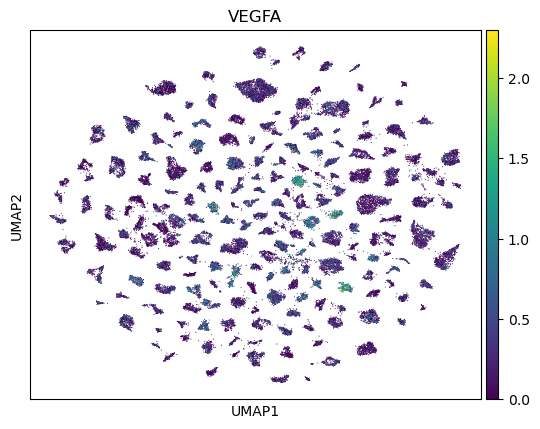

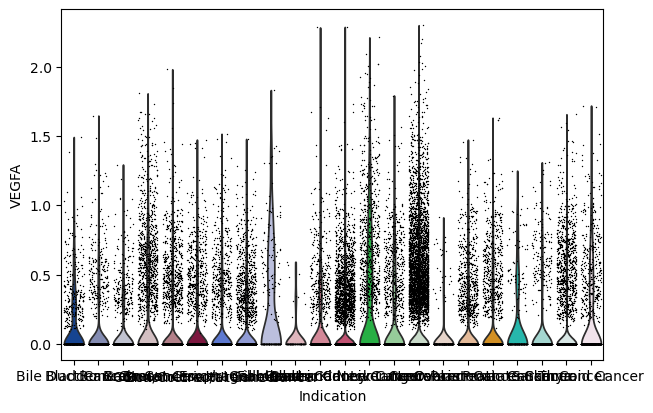

In [27]:
sc.pl.umap(adata, color=['VEGFA'])
sc.pl.violin(adata, keys='VEGFA', groupby='Indication', jitter=0.4)

In [29]:
vegfa_expr = adata[:, 'VEGFA'].X.toarray().flatten()
adata.obs['VEGFA_expr'] = vegfa_expr
print(adata.obs.groupby('Indication')['VEGFA_expr'].mean())

Indication
Bile Duct Cancer              0.143282
Bladder Cancer                0.098310
Bone Cancer                   0.095243
Brain Cancer                  0.200443
Breast Cancer                 0.103653
Colon/Colorectal Cancer       0.117709
Endometrial/Uterine Cancer    0.105525
Esophageal Cancer             0.120403
Fibroblast                    0.307371
Gallbladder Cancer            0.042324
Gastric Cancer                0.140489
Head and Neck Cancer          0.095462
Kidney Cancer                 0.347221
Liver Cancer                  0.180661
Lung Cancer                   0.167739
Neuroblastoma                 0.044653
Ovarian Cancer                0.113035
Pancreatic Cancer             0.120365
Prostate Cancer               0.149945
Sarcoma                       0.102468
Skin Cancer                   0.086845
Thyroid Cancer                0.220271
Name: VEGFA_expr, dtype: float64


/var/folders/gl/skbb6bb17rd_vw7ccnl22d0r0000gn/T/ipykernel_5366/3548619438.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(adata.obs.groupby('Indication')['VEGFA_expr'].mean())


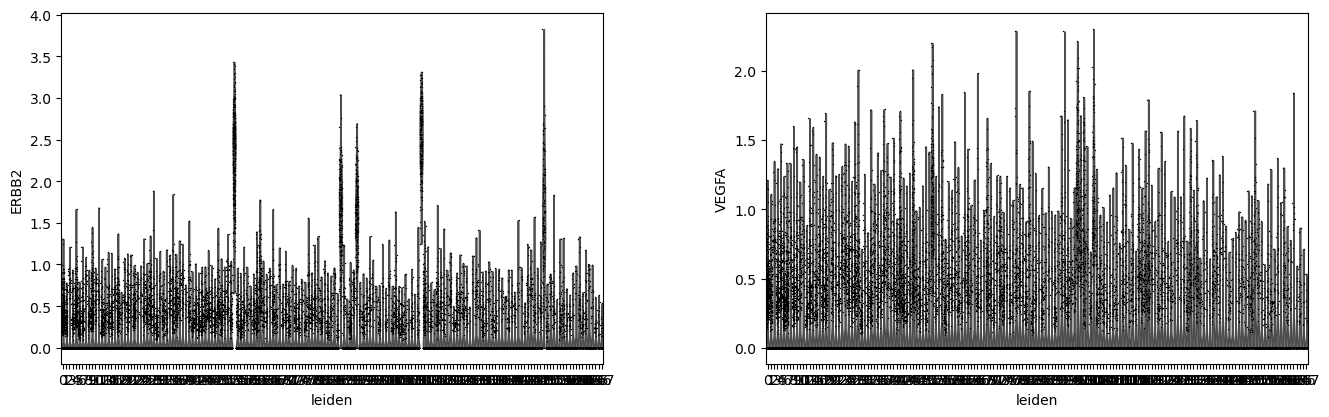

In [30]:
sc.pl.violin(adata, keys=['ERBB2', 'VEGFA'], groupby='leiden', jitter=0.4)